# 장르별 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [10]:
movie = pd.read_csv("movie_info_final.csv")

In [32]:
movie = movie.head(58)      # 59위까지 가져온 데이터 프레임

In [71]:
movie_1000 = movie.head(29) # 천만영화 데이터 프레임

In [73]:
movie_miss = movie[29:]     # 비천만영화 데이터 프레임

### 1) 장르별 영화 분포 확인

In [75]:
## 장르 리스트로 추출 ##
genre = list(movie["Genre"])
genre_1000 = list(movie_1000["Genre"])
genre_miss = list(movie_miss["Genre"])

In [76]:
genre_list = []
genre_1000_list = []
genre_miss_list = []

for i in genre:
    genre_list.extend(i.split(","))
for i in genre_1000:
    genre_1000_list.extend(i.split(","))
for i in genre_miss:
    genre_miss_list.extend(i.split(","))

In [77]:
## 장르멸 영화수 데이터 프레임 생성 ##
gdf = pd.DataFrame(pd.value_counts(genre_list))
gdf_1000 = pd.DataFrame(pd.value_counts(genre_1000_list))
gdf_miss = pd.DataFrame(pd.value_counts(genre_miss_list))

In [78]:
gdf.columns = ["count"]
gdf_1000.columns = ["count"]
gdf_miss.columns = ["count"]

Text(0.5, 1.0, '비천만 영화(29~58위)')

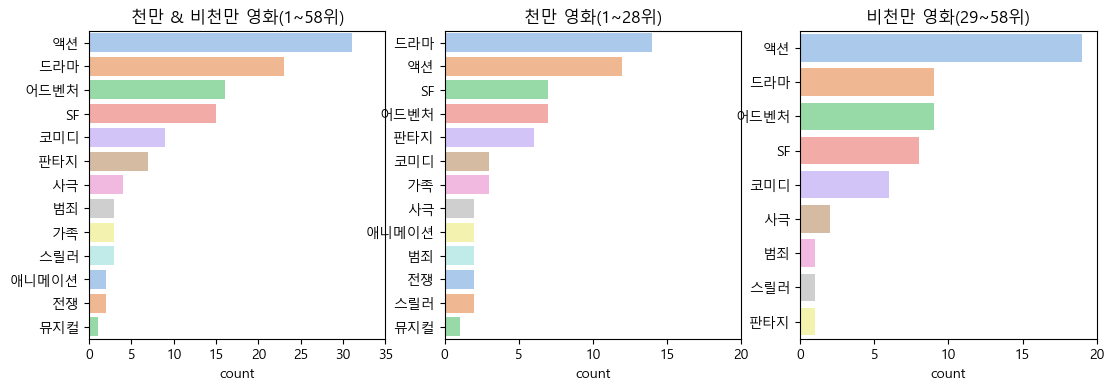

In [184]:
fig = plt.figure(figsize=(13,4)) # 그래프 위치 지정

ax1 = fig.add_subplot(131)       # 위치 지정
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.set_xlim(0, 35)              # 축 사이즈 지정
ax2.set_xlim(0, 20)
ax3.set_xlim(0, 20)

sns.barplot(x="count", y=gdf.index, data=gdf, ax=ax1, palette="pastel")
sns.barplot(x="count", y=gdf_1000.index, data=gdf_1000, ax=ax2, palette="pastel")
sns.barplot(x="count", y=gdf_miss.index, data=gdf_miss, ax=ax3, palette="pastel")

ax1.set_title("천만 & 비천만 영화(1~58위)")
ax2.set_title("천만 영화(1~28위)")
ax3.set_title("비천만 영화(29~58위)")

    천만영화는 장르별로 다양하게 분포하고 있는데 그중 드라마, 액션, SF, 어드벤쳐, 판타지에 주로 분포하고 있다.
    비천만영화는 주로 액션, 드라마, 어드벤쳐, SF, 코미디 정도까지 주로 분포를 이루고 있다.

Text(0.5, 1.0, '비천만 영화(29~58위)')

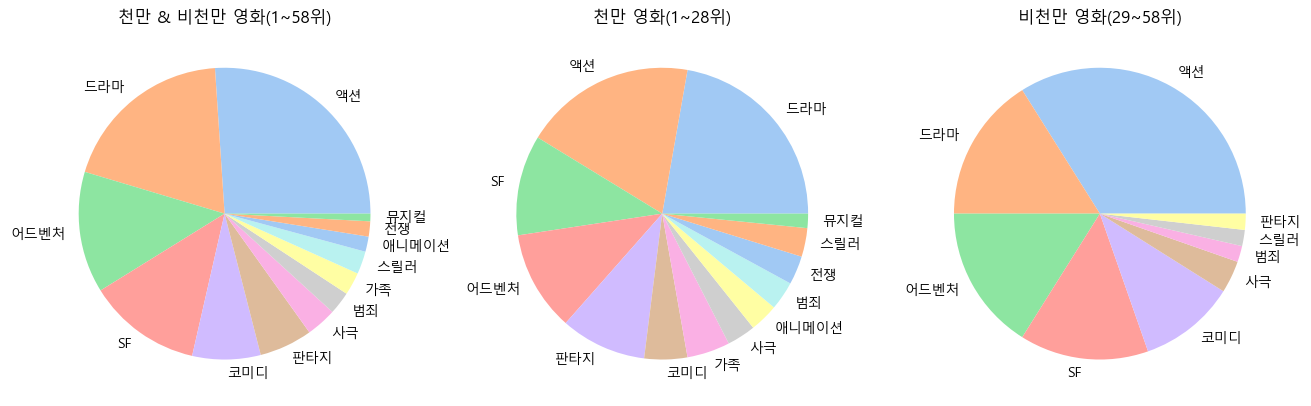

In [224]:
fig = plt.figure(figsize=(16,6)) # 그래프 위치 지정

ax1 = fig.add_subplot(131)       # 위치 지정
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

ax1.pie(gdf["count"], 
        labels=['액션', '드라마', '어드벤처', 'SF', '코미디', '판타지', '사극', '범죄', '가족', 
                '스릴러', '애니메이션', '전쟁', '뮤지컬'])
ax2.pie(gdf_1000["count"], 
        labels=['드라마', '액션', 'SF', '어드벤처', '판타지', '코미디', '가족', 
                '사극', '애니메이션', '범죄', '전쟁', '스릴러', '뮤지컬'])
ax3.pie(gdf_miss["count"], 
        labels=['액션', '드라마', '어드벤처', 'SF', '코미디', '사극', '범죄', '스릴러', '판타지'])

ax1.set_title("천만 & 비천만 영화(1~58위)")
ax2.set_title("천만 영화(1~28위)")
ax3.set_title("비천만 영화(29~58위)")

### 2) 장르별 누적 관객수 확인

In [148]:
g_1000 = movie_1000[["Title", "Genre", "Audi"]]
g_1000.set_index("Title", inplace=True)

In [187]:
g_1000

,Genre,Audi
Title,,
명량,"사극,액션",17615919
극한직업,코미디,16266338
신과함께-죄와 벌,"판타지,드라마",14414658
국제시장,드라마,14264478
어벤져스- 엔드게임,"액션,SF",13977602
겨울왕국 2,애니메이션,13750668
베테랑,"액션,드라마",13414484
아바타,"SF,액션,어드벤처",13338863
도둑들,"액션,범죄",12984701


In [150]:
g_miss = movie_miss[["Title", "Genre", "Audi"]]
g_miss.set_index("Title", inplace=True)

In [188]:
g_miss

,Genre,Audi
Title,,
보헤미안 랩소디,드라마,9948386
검사외전,"범죄,코미디",9707581
엑시트,"코미디,액션",9426960
설국열차,"SF,액션",9353799
관상,"사극,드라마",9135806
아이언맨 3,"액션,어드벤처,SF",9001679
캡틴 아메리카- 시빌 워,"액션,SF,스릴러",8678761
해적- 바다로 간 산적,어드벤처,8666208
수상한 그녀,드라마,8660801


In [189]:
## 천만 비천만 영화 누적 관객수 담을 데이터 프레임 생성 ##
genre_audi = pd.DataFrame(index=pd.unique(genre_list), columns=["천만영화", "영화수1", "비천만영화", "영화수2"], data=0)

In [190]:
genre_audi

,천만영화,영화수1,비천만영화,영화수2
사극,0,0,0,0
액션,0,0,0,0
코미디,0,0,0,0
판타지,0,0,0,0
드라마,0,0,0,0
SF,0,0,0,0
애니메이션,0,0,0,0
어드벤처,0,0,0,0
범죄,0,0,0,0
가족,0,0,0,0


In [191]:
## 장르별로 천만영화 관객수 채워넣기 ##
for gs in g_1000["Genre"]:
    for gss in gs.split(","):
        for idx in range(len(genre_audi)):
            if gss == genre_audi.index[idx]:
                genre_audi["천만영화"][idx] += g_1000["Audi"][idx]
                genre_audi["영화수1"][idx] += 1

In [193]:
## 장르별로 비천만영화 관객수 채워넣기 ##
for gs in g_miss["Genre"]:
    for gss in gs.split(","):
        for idx in range(len(genre_audi)):
            if gss == genre_audi.index[idx]:
                genre_audi["비천만영화"][idx] += g_miss["Audi"][idx]
                genre_audi["영화수2"][idx] += 1

In [195]:
genre_audi["천만영화관객"] = genre_audi["천만영화"] / genre_audi["영화수1"]
genre_audi["비천만영화관객"] = genre_audi["비천만영화"] / genre_audi["영화수2"]

In [201]:
genre_audi.fillna(0, inplace=True)

In [205]:
genre_audi

,천만영화,영화수1,비천만영화,영화수2,천만영화관객,비천만영화관객
사극,35231838,2,39793544,2,17615919.0,19896772.0
액션,195196056,12,368888078,19,16266338.0,19415162.0
코미디,43243974,3,113123520,6,14414658.0,18853920.0
판타지,85586868,6,18707598,1,14264478.0,18707598.0
드라마,195686428,14,164444508,9,13977602.0,18271612.0
SF,96254676,7,144026864,8,13750668.0,18003358.0
애니메이션,26828968,2,0,0,13414484.0,0.0
어드벤처,93372041,7,155991744,9,13338863.0,17332416.0
범죄,25969402,2,17321602,1,12984701.0,17321602.0
가족,38436432,3,0,0,12812144.0,0.0


In [206]:
genre_audi.to_csv("genre_audi.csv", encoding="utf-8", index=False)

Text(0.5, 0, '장르별 누적 관객수')

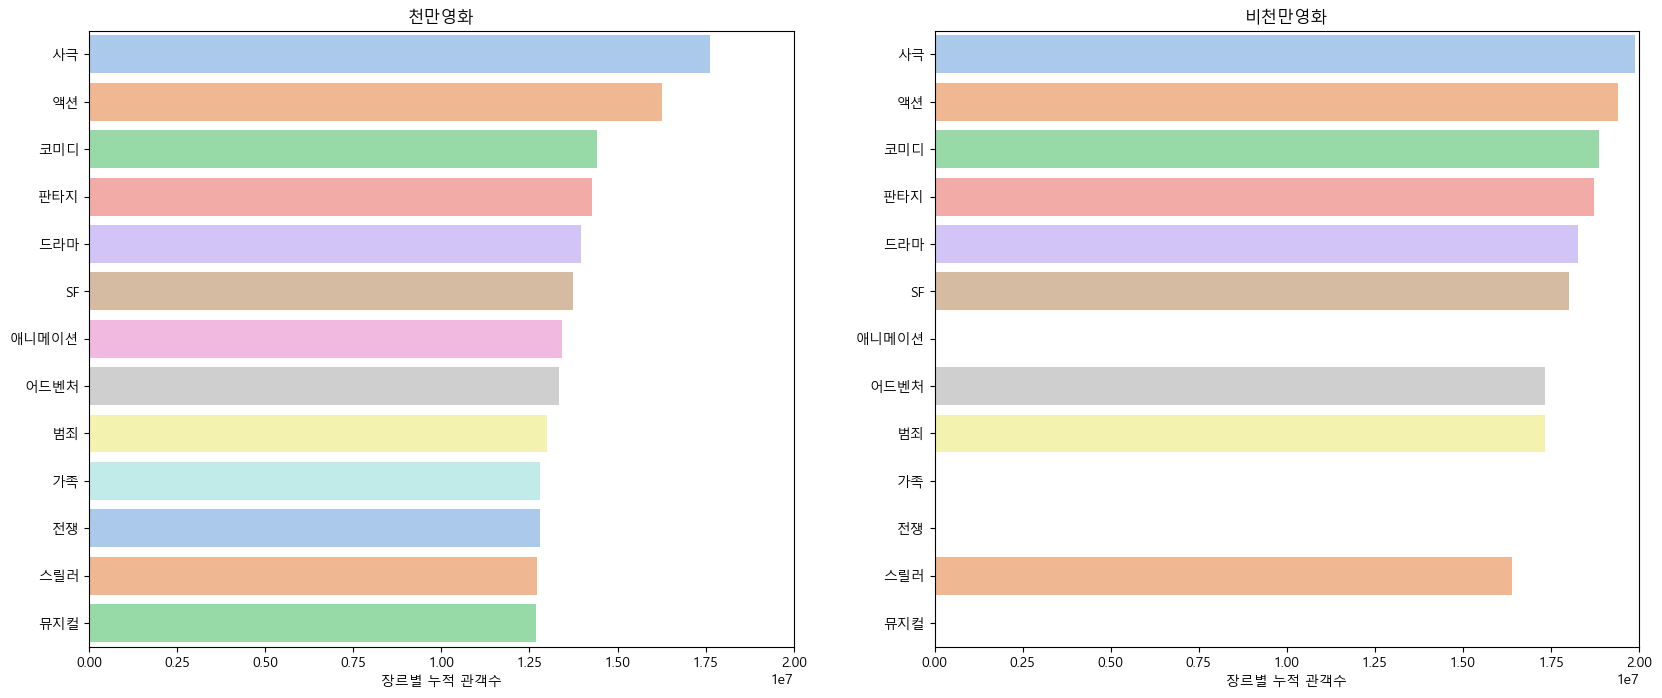

In [204]:
fig = plt.figure(figsize=(20,8)) # 그래프 위치 지정

ax1 = fig.add_subplot(121)       # 위치 지정
ax2 = fig.add_subplot(122)

ax1.set_xlim(0, 2e7)             # 축 사이즈 지정
ax2.set_xlim(0, 2e7)

sns.barplot(x="천만영화관객", y=genre_audi.index, data=genre_audi, ax=ax1, palette="pastel")
sns.barplot(x="비천만영화관객", y=genre_audi.index, data=genre_audi, ax=ax2, palette="pastel")

ax1.set_title("천만영화")
ax2.set_title("비천만영화")
ax1.set_xlabel("장르별 누적 관객수")
ax2.set_xlabel("장르별 누적 관객수")

    공통적으로 사극영화에 누적 관람객 수가 돋보적으로 많다.
    -> 천만영화를 노리기 위해선 사극장르를 택하는게..?읭..
    
    * 장르 분포만 보면 액션이 월들히 많은데 관객수로 보면 사극이 더 많다. 이건 어떻게 분석을 해야할까용..
    
    -> 주류 장르는 액션인데 관객수는 사극이 더 많은 기묘한 현상(영화수에 비해 관객수가 넘 많음).
        - 명량이나 관상같이 천만에 든 영화들의 다양한 요인들을 분석한 결과를 도입해서 이런 요인들이 있었기에 
          액션을 뛰어넘어 사극이 이런 많은 관람객수를 달성할 수 있었다? 이런 식으로 끌어가야 할 것 같다.

    참고 : 장르가 여러 개인 영화는 각 장르마다 중복 추가, 장르별 누적 관객수는 포함되는 영화수로 합한 관객수 나눴음(평균값임).